[[29 88]
 [99 77]
 [ 7 81]
 ...
 [81 95]
 [63  6]
 [50 42]]
[2552 7623  567 ... 7695  378 2100]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
450/450 - 2s - loss: 66.0320 - val_loss: 37.6533
Epoch 2/20
450/450 - 2s - loss: 33.3575 - val_loss: 29.0204
Epoch 3/20
450/450 - 2s - l

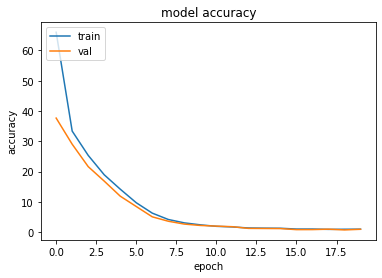

In [3]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

trainingInput = np.array([[random.randrange(1, 100) ,  random.randrange(1,100)] for i in range(1, 100*100*5)])
trainingOutput =  np.array([(input [0] * input [1]) for input  in trainingInput ])

print(trainingInput)
print(trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mape')

print(model.summary())
history = model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.1, epochs=20, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [4]:
a = np.array([[10, 2], [3.5,4], [21, 0.5], [1.5, 48.6], [20, 20]])
print(model.predict(a))

[[ 20.053354]
 [ 15.321399]
 [ 10.695559]
 [ 73.944176]
 [400.346   ]]


[[4.00733319 4.40671925]
 [3.95124372 2.77258872]
 [4.17438727 4.35670883]
 ...
 [3.13549422 3.61091791]
 [3.58351894 0.        ]
 [4.56434819 3.8501476 ]]
[8.41405243 6.72383244 8.5310961  ... 6.74641213 3.58351894 8.41449579]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
45/45 - 1s - loss: 12.5632 - val_loss: 9.6931
Epoch 2/25
45/45 - 0s - loss: 8.2117 - val_loss: 6.9720
Epoch 3/25
45/45 - 0s - loss: 6.4171 - val_l

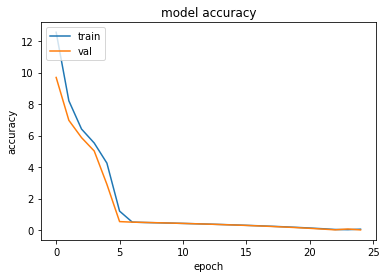

In [5]:
# Log version

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import math

trainingInput = np.array([[math.log(random.randrange(1, 100)) ,  math.log(random.randrange(1,100))] for i in range(1, 100*100*5)])
trainingOutput =  np.array([(input [0] + input [1]) for input  in trainingInput ])

print(trainingInput)
print(trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="linear"), # does only addition, so 1 neuron is sufficient
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mae')

print(model.summary())
history = model.fit(trainingInput, trainingOutput, batch_size=100*10, validation_split=0.1, epochs=25, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [7]:
a = np.array([[math.log(3.5), math.log(4)]])
print(math.exp(model.predict(a)))

13.90151163991406
